In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

def get_data(week_num):
    url='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    defs=[]
    for week in week_num :
        file_url=url.format(week)
        defs.append(pd.read_csv(file_url))
    return pd.concat(defs)


week_num = [210703,210710,210717,210724,210731,210807,210814,210821,210828,210904,210911,210918,210925]

Three_Months = get_data(week_num)

In [ ]:
#change to timeSerises and make it in one col called [DATE_TIME]
Three_Months["DATE_TIME"] = pd.to_datetime(Three_Months.DATE+" "+Three_Months.TIME,
                                                  format="%m/%d/%Y %H:%M:%S")

In [ ]:
Three_Months.describe().apply(lambda s: s.apply('{0:.1f}'.format))

In [ ]:
Three_Months.columns

In [ ]:
#take out the spaces in my columns names.
Three_Months.columns = [column.strip() for column in Three_Months.columns]
Three_Months.columns

In [ ]:
Three_Months.head(10)

In [ ]:
#three months of data.
Three_Months.DATE.value_counts().sort_index()

In [ ]:
#C/A	Control Area (A002)
#UNIT	Remote Unit for a station (R051)
#SCP	Subunit Channel Position represents an specific address for a device (02-00-00)
#STATION	Represents the station name the device is located at
#LINENAME	Represents all train lines that can be boarded at this station
#DIVISION	Represents the Line originally the station belonged to BMT, IRT, or IND
#DATE	Represents the date (MM-DD-YY)
#TIME	Represents the time (hh:mm:ss) for a scheduled audit event
#DESC	Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
#ENTRIES	The comulative entry register value for a device
#EXITS	The cumulative exit register value for a device

In [ ]:
#Three_Months_subset = Three_Months[['C/A','SCP','UNIT','STATION','LINENAME','DIVISION','ENTRIES', 'EXITS', 'DATE_TIME']]

In [ ]:
#Three_Months_subset.head(10)

In [ ]:
mask = ((Three_Months["C/A"] == "A002") &
        (Three_Months["UNIT"] == "R051") & 
        (Three_Months["SCP"] == "02-00-00") & 
        (Three_Months["STATION"] == "59 ST"))

Three_Months[mask].head()

In [ ]:
#Take a look on the duplicate. at 2021-07-3 
#Check how many Entries i have at sepcific hour if its more 1 i have drop duplicated entries
(Three_Months
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

In [ ]:

mask = ((Three_Months["C/A"] == "S101") & 
(Three_Months["UNIT"] == "R070") & 
(Three_Months["SCP"] == "00-00-02") & 
(Three_Months["STATION"] == "ST. GEORGE") &
(Three_Months["DATE_TIME"].dt.date == datetime.datetime(2021,9,16).date()))
Three_Months[mask].head()

In [ ]:
mask = ((Three_Months["C/A"] == "A006") &
        (Three_Months["UNIT"] == "R079") & 
        (Three_Months["SCP"] == "00-03-02") & 
        (Three_Months["STATION"] == "5 AV/59 ST"))

Three_Months[mask].head()

In [ ]:
# Get rid of the duplicate entry
Three_Months.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
Three_Months.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [ ]:
#Take a look on after droping the duplicate . at 2016-09-16 
mask = ((Three_Months["C/A"] == "R504") & 
(Three_Months["UNIT"] == "R276") & 
(Three_Months["SCP"] == "00-00-01") & 
(Three_Months["STATION"] == "VERNON-JACKSON") &
(Three_Months["DATE_TIME"].dt.date == datetime.datetime(2021, 7, 31).date()))
Three_Months[mask].head()

In [ ]:
(Three_Months
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

In [ ]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored #DON'T EXECUTE IT!
Three_Months = Three_Months.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [ ]:
turnstiles_daily = (Three_Months
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [ ]:
turnstiles_daily.head()

In [ ]:
Three_Months[(Three_Months["C/A"] == "A011") & 
(Three_Months["UNIT"] == "R080") & 
(Three_Months["SCP"] == "01-00-00") & 
(Three_Months["STATION"] == "57 ST-7 AV") &
(Three_Months["DATE"] == "07/03/2021")]

In [ ]:
turnstiles_daily = (Three_Months
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [ ]:
turnstiles_daily.head()

In [ ]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                   .apply(lambda grp: grp.shift(1)))

In [ ]:
turnstiles_daily.head()

In [ ]:
turnstiles_daily.dropna(subset=["PREV_DATE","PREV_ENTRIES"]
                                            ,axis=0,inplace=True)

In [ ]:
turnstiles_daily.head()

In [ ]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

In [ ]:
# What's the deal with counter being in reverse
mask = ((Three_Months["C/A"] == "A011") & 
(Three_Months["UNIT"] == "R080") & 
(Three_Months["SCP"] == "01-00-00") & 
(Three_Months["STATION"] == "57 ST-7 AV") &
(Three_Months["DATE_TIME"].dt.date == datetime.datetime(2021, 7, 3).date()))
Three_Months[mask].head()

In [ ]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

In [ ]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

In [410]:
#combine the numbers together. 
#For each ControlArea/UNIT/STATION combo, 
#for each day, sum the counts from each turnstile 
#belonging to that combo


ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT","SCP","STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()
#ca_unit_station_daily["TURNSTILES"] = ca_unit_station_daily["C/A"]+" - "+ca_unit_station_daily["UNIT"]+" - "+ca_unit_station_daily["SCP"]+" - "+ca_unit_station_daily["STATION"]+" - "+ca_unit_station_daily["DATE"]


ca_unit_station_daily["DATE"] = pd.to_datetime(ca_unit_station_daily["DATE"])


ca_unit_station_daily.head()




,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-06-27,311.0
1,A002,R051,02-00-00,59 ST,2021-06-28,552.0
2,A002,R051,02-00-00,59 ST,2021-06-29,549.0
3,A002,R051,02-00-00,59 ST,2021-06-30,626.0
4,A002,R051,02-00-00,59 ST,2021-07-01,549.0


In [413]:
#daily time series for each STATION, by adding up all the turnstiles in a station.

station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

#station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
#station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
#ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT","SCP","STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,06/27/2021,6835.0
1,1 AV,06/28/2021,7529.0
2,1 AV,06/29/2021,7231.0
3,1 AV,06/30/2021,7588.0
4,1 AV,07/01/2021,7687.0


In [448]:
#Over multiple weeks, sum total ridership for each 
#station and sort them, so you can find out the stations 
#with the highest traffic during the time you investigate


station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()

station_totals.head(100000)

,STATION,DAILY_ENTRIES
0,JUNCTION BLVD,5581333.0
1,34 ST-PENN STA,3774491.0
2,FULTON ST,3009494.0
3,PATH NEW WTC,2960928.0
4,86 ST,2732452.0
...,...,...
361,AVENUE I,1343.0
362,CYPRESS HILLS,890.0
363,BEACH 60 ST,877.0
364,JUNIUS ST,873.0


In [414]:
#matplotlib graphs
#Select one turnstile (combination of [C/A, UNIT, SCP, STATION])
#Filter your pandas DataFrame so it 
#only represents a single turnstile 
#(make sure that turnstile has entries for multiple days).
#Using matplotlib, 
#create a plot with the days on the X axis and the daily entries for that turnstile on the Y axis

single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3095,A011,R080,01-00-00,57 ST-7 AV,06/27/2021,495486,06/26/2021,495361.0,125.0
3096,A011,R080,01-00-00,57 ST-7 AV,06/28/2021,495665,06/27/2021,495486.0,179.0
3097,A011,R080,01-00-00,57 ST-7 AV,06/29/2021,495843,06/28/2021,495665.0,178.0
3098,A011,R080,01-00-00,57 ST-7 AV,06/30/2021,496014,06/29/2021,495843.0,171.0
3099,A011,R080,01-00-00,57 ST-7 AV,07/01/2021,496167,06/30/2021,496014.0,153.0


Text(0.5, 1.0, 'Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

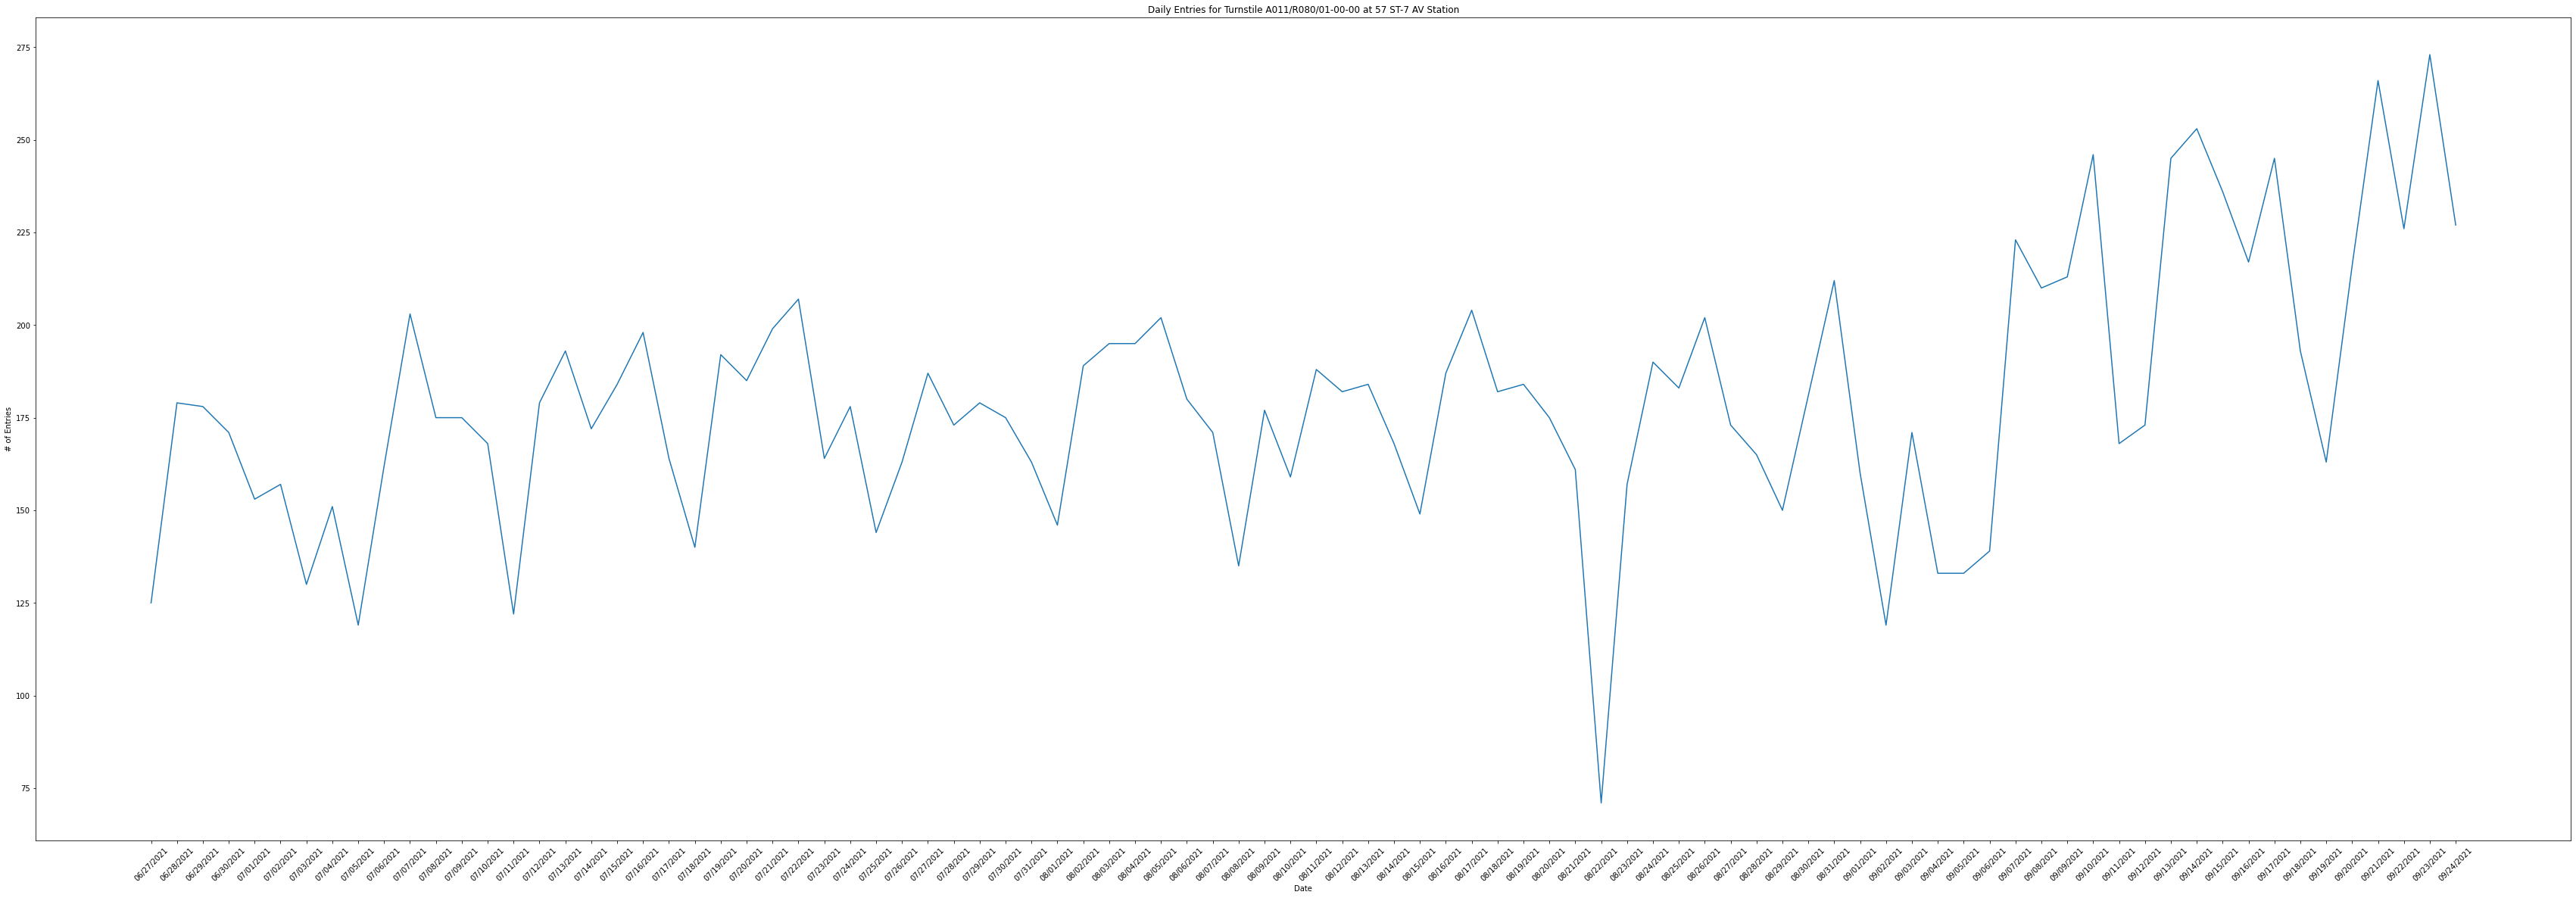

In [415]:
plt.figure(figsize=(60,20))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

In [416]:
#Plot the daily time series for a station

station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()


,STATION,DATE,DAILY_ENTRIES
7554,57 ST-7 AV,06/27/2021,6830.0
7555,57 ST-7 AV,06/28/2021,9043.0
7556,57 ST-7 AV,06/29/2021,9557.0
7557,57 ST-7 AV,06/30/2021,9569.0
7558,57 ST-7 AV,07/01/2021,9350.0


Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

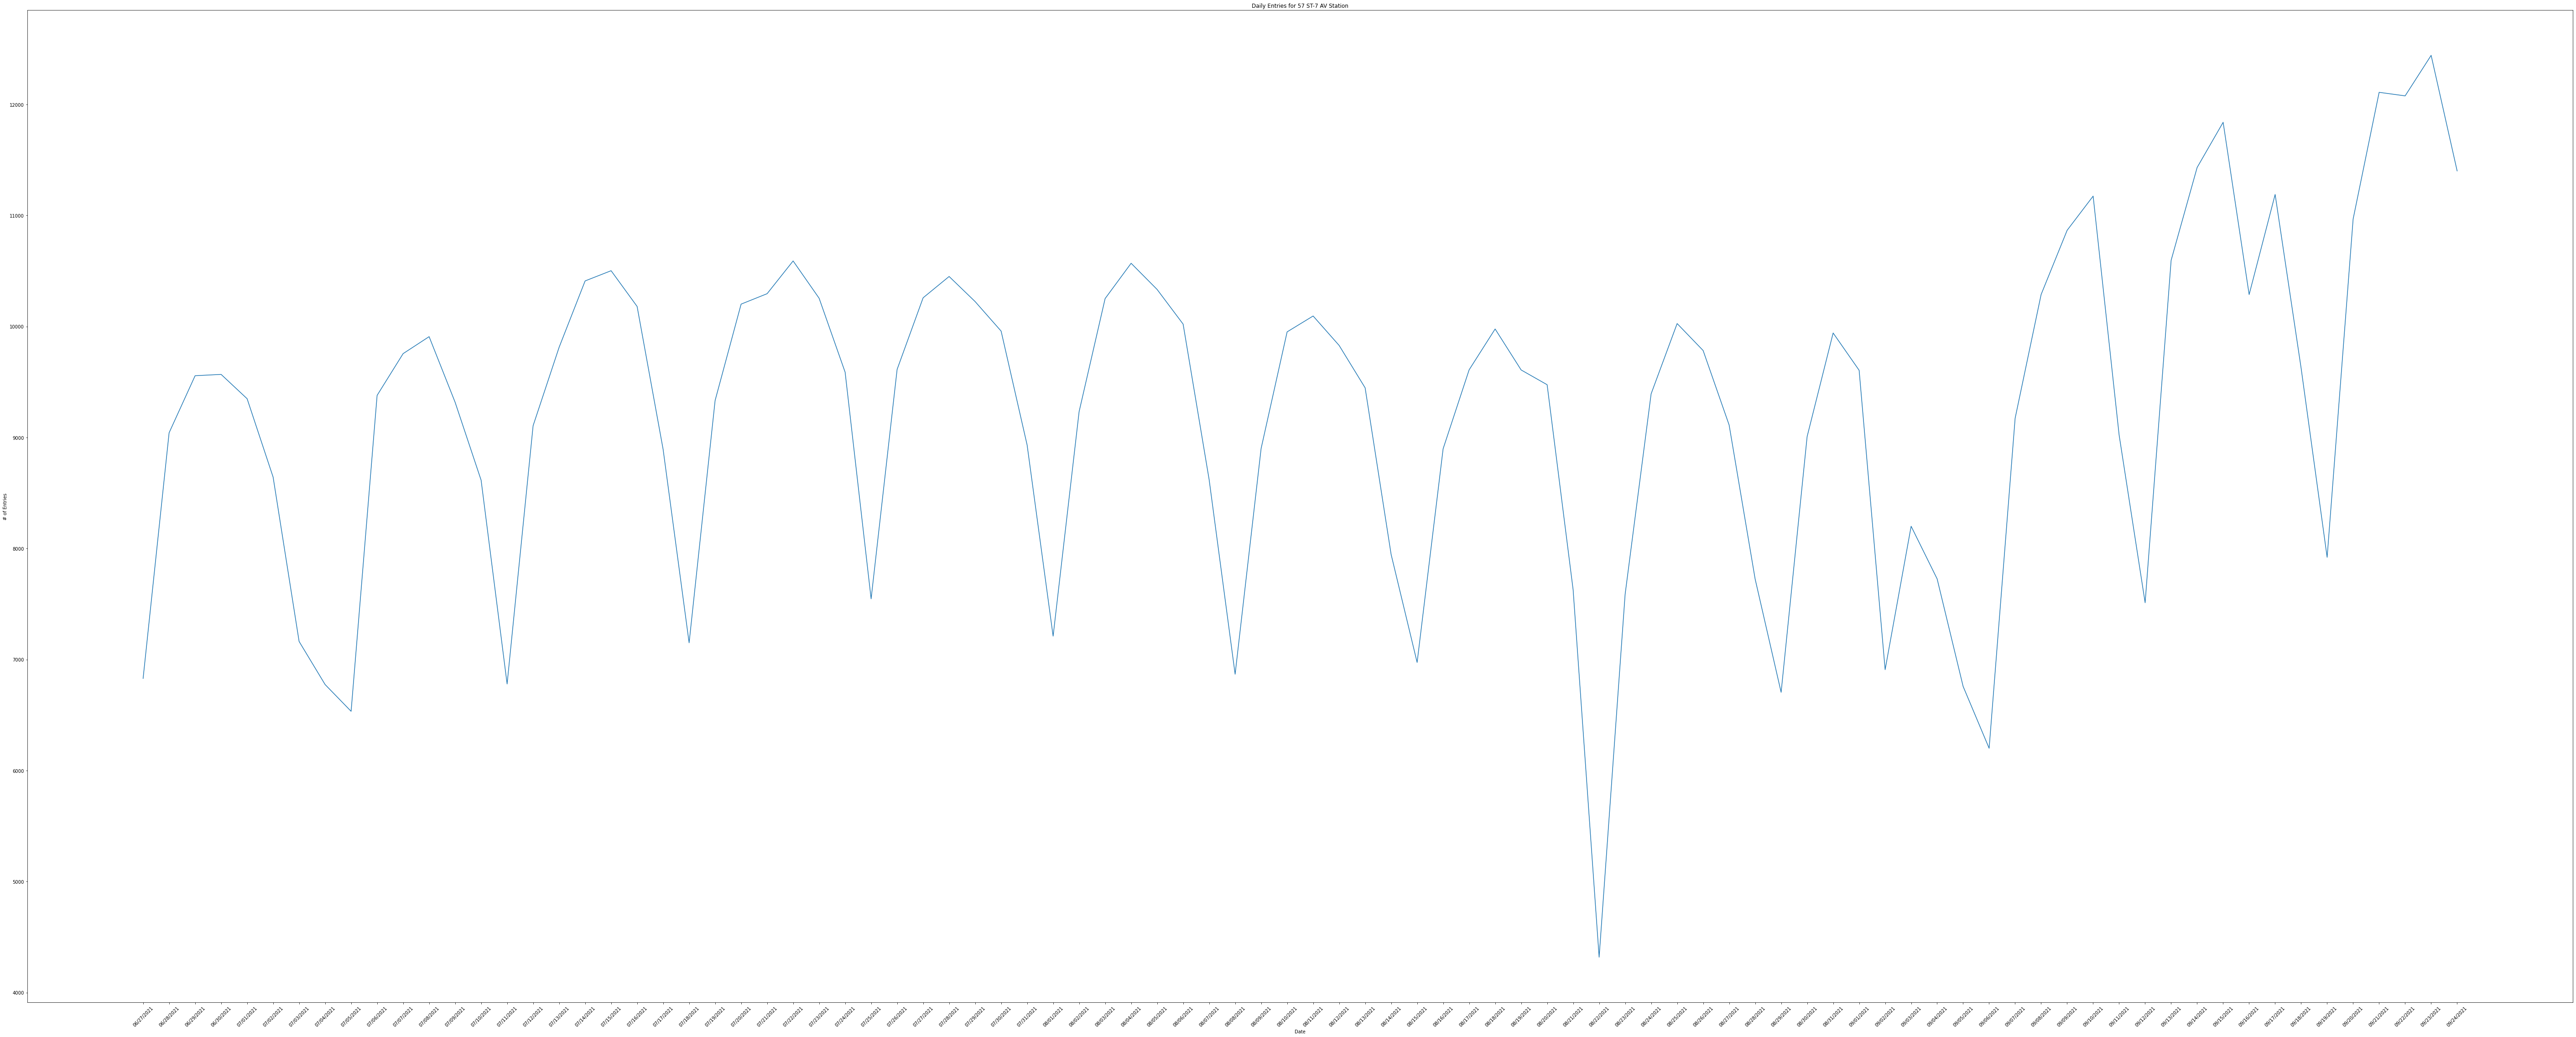

In [417]:
plt.figure(figsize=(100,40))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')

In [418]:
#Make one list of counts for one week for one station. 
#Monday's count, Tuesday's count, etc. 
#so it's a list of 7 counts.
#Make the same list for another week, and another week, and another week.


station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()


<ipython-input-418-b7821b24b6a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
<ipython-input-418-b7821b24b6a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week


,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
7554,57 ST-7 AV,06/27/2021,6830.0,6,25
7555,57 ST-7 AV,06/28/2021,9043.0,0,26
7556,57 ST-7 AV,06/29/2021,9557.0,1,26
7557,57 ST-7 AV,06/30/2021,9569.0,2,26
7558,57 ST-7 AV,07/01/2021,9350.0,3,26


Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

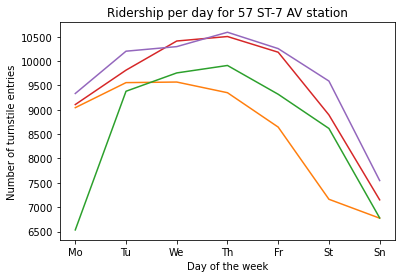

In [420]:

#x_4 =station_daily_57_av.groupby('WEEK_OF_YEAR').head(4)
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'): 
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    if i == 29:
        break;
        
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

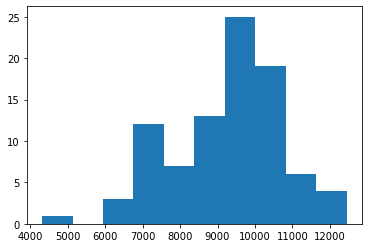

In [421]:
#Make a single list of these total ridership values and plot it
#to get an idea about the distribution of total ridership among different stations.
#This should show you that most stations have a small traffic, and the 
#histogram bins for large traffic volumes have small bars

plt.hist(station_daily_57_av['DAILY_ENTRIES']);



In [469]:
#ca_unit_station_daily = ca_unit_station_daily.loc[~((ca_unit_station_daily.DAILY_ENTRIES < ca_unit_station_daily.DAILY_ENTRIES.mean()))] #336593 
ca_unit_station_daily.describe() #dont run it again.

,DAILY_ENTRIES
count,149328.000000
mean,980.719075
std,8945.846519
min,435.000000
25%,542.000000
50%,687.000000
75%,928.000000
max,993455.000000


In [447]:
station_totals 

,STATION,DAILY_ENTRIES
0,JUNCTION BLVD,5581333.0
1,34 ST-PENN STA,3774491.0
2,FULTON ST,3009494.0
3,PATH NEW WTC,2960928.0
4,86 ST,2732452.0
...,...,...
361,AVENUE I,1343.0
362,CYPRESS HILLS,890.0
363,BEACH 60 ST,877.0
364,JUNIUS ST,873.0


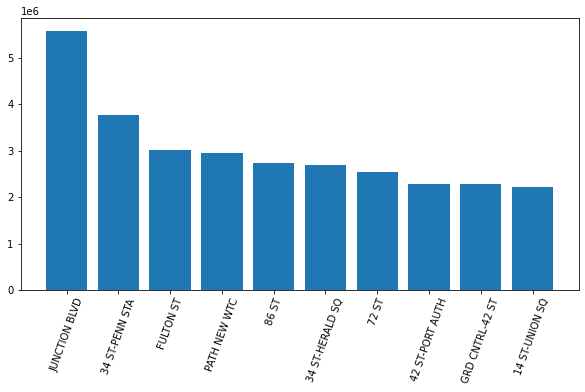

In [468]:
#Viewing top ten stations OVER THREE MONTHS 

plt.figure(figsize=(10,5))
plt.bar(x=station_totals['STATION'][:10] , height = station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=70);


In [453]:
station_daily = ca_unit_station_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().sort_values("DAILY_ENTRIES").reset_index()
#station_totals = station_daily.groupby('STATION').sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
#ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT","SCP","STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()







STD_PLUS_MEAN = ca_unit_station_daily[ca_unit_station_daily.DAILY_ENTRIES>(ca_unit_station_daily.DAILY_ENTRIES.std() + ca_unit_station_daily.DAILY_ENTRIES.mean())] 
#ca_unit_station_daily.DAILY_ENTRIES.std() - ca_unit_station_daily.DAILY_ENTRIES.mean() = 7965.12744466728
#STD_DIFF_MEAN = ca_unit_station_daily[(ca_unit_station_daily.DAILY_ENTRIES > ca_unit_station_daily.DAILY_ENTRIES.mean()) & (ca_unit_station_daily.DAILY_ENTRIES < 7965.097490936243)]


station_daily


,STATION,DATE,DAILY_ENTRIES
0,LAFAYETTE AV,2021-09-04,435.0
1,JUNIUS ST,2021-09-17,435.0
2,NECK RD,2021-08-27,435.0
3,46 ST BLISS ST,2021-09-05,435.0
4,ASTORIA BLVD,2021-08-29,435.0
...,...,...,...
27688,PELHAM PKWY,2021-09-06,800104.0
27689,FULTON ST,2021-07-29,805257.0
27690,HOUSTON ST,2021-08-05,995102.0
27691,JUNCTION BLVD,2021-09-16,2291470.0


In [454]:
SORTED_DAILY_EN = ca_unit_station_daily.sort_values("DAILY_ENTRIES",ascending=False).reset_index()
SORTED_DAILY_EN.head(20)


,index,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,293129,R123,R290,00-00-02,HOUSTON ST,2021-08-05,993455.0
1,383261,R327,R361,01-06-00,PELHAM PKWY,2021-09-06,798740.0
2,412806,R528,R097,00-00-02,JUNCTION BLVD,2021-09-18,796277.0
3,412804,R528,R097,00-00-02,JUNCTION BLVD,2021-09-16,789214.0
4,412716,R528,R097,00-00-01,JUNCTION BLVD,2021-09-18,774522.0
5,412714,R528,R097,00-00-01,JUNCTION BLVD,2021-09-16,774447.0
6,73702,H010,R235,01-03-01,BEDFORD AV,2021-08-27,702266.0
7,221154,N519,R461,00-00-00,B'WAY-LAFAYETTE,2021-08-17,656078.0
8,270079,PTH17,R541,01-00-09,THIRTY THIRD ST,2021-09-08,624355.0
9,261653,PTH07,R550,00-00-08,CITY / BUS,2021-07-31,608973.0


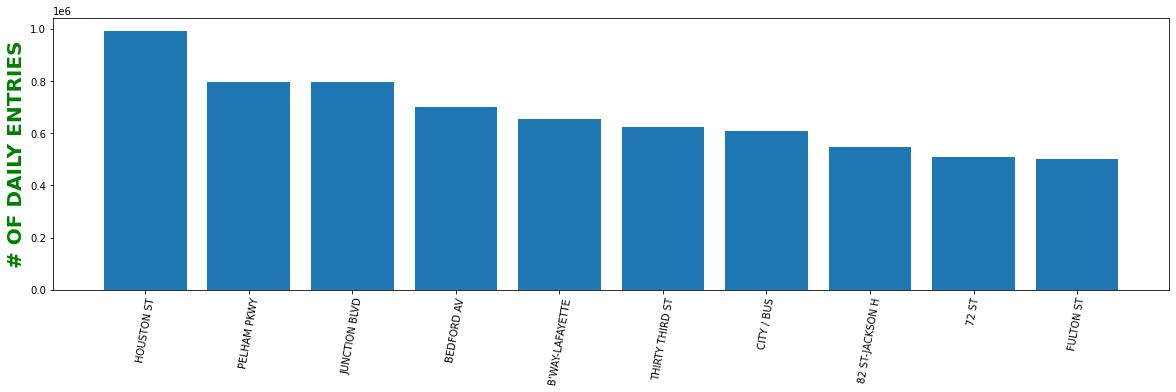

In [466]:

plt.figure(figsize=(20,5))
plt.bar(x = SORTED_DAILY_EN['STATION'][:14], height = SORTED_DAILY_EN['DAILY_ENTRIES'][:14])
plt.xticks(rotation=80);
plt.ylabel('# OF DAILY ENTRIES',fontsize = 20, weight = 'bold',color='green');

In [438]:
sumOf_mean_std = STD_PLUS_MEAN.groupby(["C/A",'UNIT','SCP','STATION',"DATE"]).sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()
sumOf_mean_std.head(20)

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,R123,R290,00-00-02,HOUSTON ST,2021-08-05,993455.0
1,R327,R361,01-06-00,PELHAM PKWY,2021-09-06,798740.0
2,R528,R097,00-00-02,JUNCTION BLVD,2021-09-18,796277.0
3,R528,R097,00-00-02,JUNCTION BLVD,2021-09-16,789214.0
4,R528,R097,00-00-01,JUNCTION BLVD,2021-09-18,774522.0
5,R528,R097,00-00-01,JUNCTION BLVD,2021-09-16,774447.0
6,H010,R235,01-03-01,BEDFORD AV,2021-08-27,702266.0
7,N519,R461,00-00-00,B'WAY-LAFAYETTE,2021-08-17,656078.0
8,PTH17,R541,01-00-09,THIRTY THIRD ST,2021-09-08,624355.0
9,PTH07,R550,00-00-08,CITY / BUS,2021-07-31,608973.0


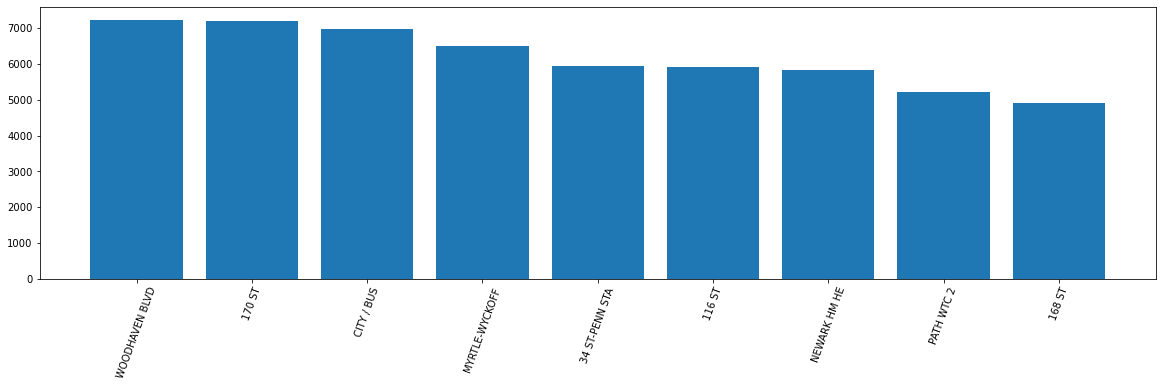

In [470]:
plt.figure(figsize=(20,5))
plt.bar(x= STD_DIFF_MEAN["STATION"][:15] , height = STD_DIFF_MEAN['DAILY_ENTRIES'][:15])
plt.xticks(rotation=70);

In [471]:
STD_DIFF_MEAN = STD_DIFF_MEAN.groupby(["C/A",'UNIT','SCP','STATION',"DATE"]).sum().sort_values('DAILY_ENTRIES', ascending=False).reset_index()

,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,J031,R006,00-00-03,WOODHAVEN BLVD,2021-09-11,7231.0
1,R284,R243,00-03-02,170 ST,2021-07-12,7199.0
2,PTH07,R550,00-00-08,CITY / BUS,2021-07-27,6986.0
3,H026,R137,00-03-00,MYRTLE-WYCKOFF,2021-09-18,6504.0
4,H026,R137,00-03-02,MYRTLE-WYCKOFF,2021-09-18,6425.0
...,...,...,...,...,...,...
32041,B004,R171,00-00-00,7 AV,2021-07-13,981.0
32042,N067,R012,00-03-00,34 ST-PENN STA,2021-09-19,981.0
32043,N535,R220,00-00-02,CARROLL ST,2021-08-11,981.0
32044,A025,R023,01-06-00,34 ST-HERALD SQ,2021-09-13,981.0


In [472]:


TOP_20_BSTATIONS = station_totals.head(20)

In [473]:
TOP_20_BSTATIONS

,STATION,DAILY_ENTRIES
0,JUNCTION BLVD,5581333.0
1,34 ST-PENN STA,3774491.0
2,FULTON ST,3009494.0
3,PATH NEW WTC,2960928.0
4,86 ST,2732452.0
5,34 ST-HERALD SQ,2700100.0
6,72 ST,2551065.0
7,42 ST-PORT AUTH,2281839.0
8,GRD CNTRL-42 ST,2274172.0
9,14 ST-UNION SQ,2218625.0


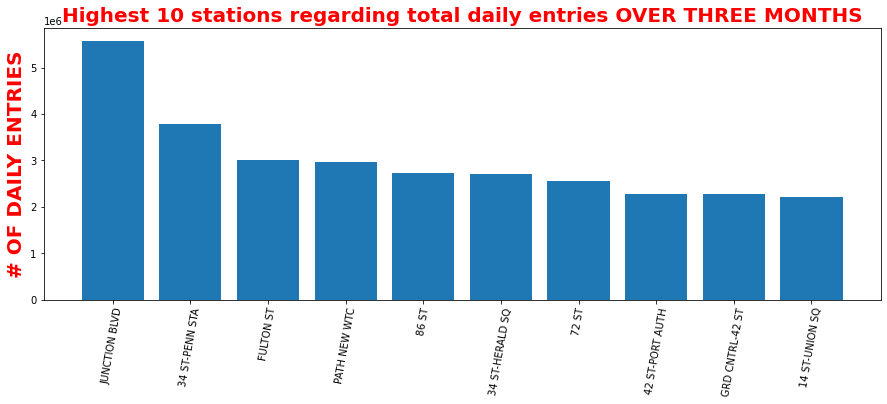

In [499]:

plt.figure(figsize=(15,5))
plt.bar(x= TOP_20_BSTATIONS['STATION'][:10], height = TOP_20_BSTATIONS ['DAILY_ENTRIES'][:10])
plt.xticks(rotation=80);
plt.ylabel('# OF DAILY ENTRIES',fontsize = 20, weight = 'bold',color='red');
plt.title("Highest 10 stations regarding total daily entries OVER THREE MONTHS",fontsize = 20, weight = 'bold',color='red');

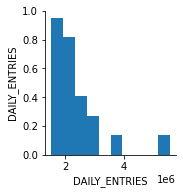

In [514]:
sns.pairplot(TOP_20_BSTATIONS);

In [478]:
TOP_20_sSTATIONS =station_totals.tail(20)

In [477]:
TOP_20_sSTATIONS

,STATION,DAILY_ENTRIES
346,SUTPHIN BLVD,22025.0
347,HUNTERS PT AV,21888.0
348,BEACH 67 ST,16610.0
349,WHITLOCK AV,16405.0
350,MORRIS PARK,15883.0
351,AVENUE N,13747.0
352,CORTLANDT ST,10894.0
353,NEWARK HW BMEBE,7477.0
354,HEWES ST,6572.0
355,BOTANIC GARDEN,5295.0


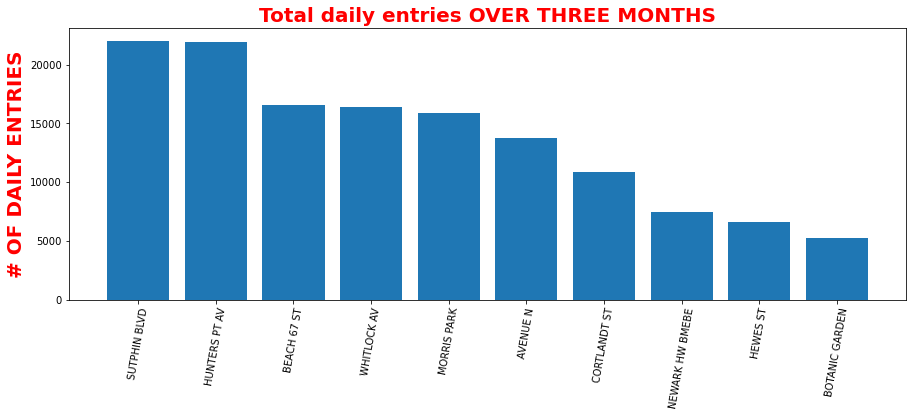

In [501]:



plt.figure(figsize=(15,5))
plt.bar(x= TOP_20_sSTATIONS['STATION'][:10], height = TOP_20_sSTATIONS ['DAILY_ENTRIES'][:10])


plt.xticks(rotation=80);
plt.ylabel('# OF DAILY ENTRIES',fontsize = 20, weight = 'bold',color='red');
plt.title("Total daily entries OVER THREE MONTHS",fontsize = 20, weight = 'bold',color='red');
    
    
    
    

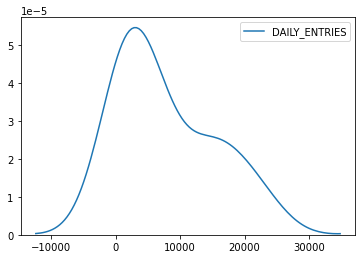

In [513]:
sns.kdeplot(TOP_20_sSTATIONS['DAILY_ENTRIES']);

In [502]:
from sqlalchemy import create_engine

In [503]:
en = create_engine('sqlite://',echo=False)

In [505]:
ca_unit_station_daily.to_sql("mta",con= en)

In [506]:
s = pd.read_sql('SELECT * FROM mta ORDER BY STATION limit 10;',en)

In [507]:
s

,index,C/A,UNIT,SCP,STATION,DATE,DAILY_ENTRIES
0,70132,H007,R248,00-00-00,1 AV,2021-06-28 00:00:00.000000,521.0
1,70133,H007,R248,00-00-00,1 AV,2021-06-29 00:00:00.000000,495.0
2,70134,H007,R248,00-00-00,1 AV,2021-06-30 00:00:00.000000,487.0
3,70135,H007,R248,00-00-00,1 AV,2021-07-01 00:00:00.000000,571.0
4,70136,H007,R248,00-00-00,1 AV,2021-07-02 00:00:00.000000,543.0
5,70140,H007,R248,00-00-00,1 AV,2021-07-06 00:00:00.000000,502.0
6,70141,H007,R248,00-00-00,1 AV,2021-07-07 00:00:00.000000,547.0
7,70142,H007,R248,00-00-00,1 AV,2021-07-08 00:00:00.000000,570.0
8,70143,H007,R248,00-00-00,1 AV,2021-07-09 00:00:00.000000,524.0
9,70147,H007,R248,00-00-00,1 AV,2021-07-13 00:00:00.000000,519.0
